# Machine Learning topological phases in real space: Nearest-neighbours SSH model 6561_110.

In this notebook we produce the results of the machine learning analysis of topological phase transitions occurring  in nearest-neighbours SSH models as decribed in the paper [Machine learning topological phases in real space](https://arxiv.org/abs/1901.01963).

## Running models with SSH data

In [1]:
%%time
%load_ext autoreload
%autoreload 2
from simulation import *

CPU times: user 714 ms, sys: 99.6 ms, total: 814 ms
Wall time: 3.35 s


In [2]:
%%time
### YOU MAY NEED TO CHANGE THE CSV FILENAME!
csv_path = "/home/rio/data/phase_transitions/csv/first_neighbours_open_6561_110.csv"
model = DecisionTreeClassifier(criterion="entropy")
########## YOU MAY NEED TO CHANGE THE ALLOWED WINDINGS!
allowed_windings = [0,1]
########## YOU MAY NEED TO CHANGE THE SIMULATION DIR!
simulation_dir = "/home/rio/data/phase_transitions/simulations/first_neighbours_open_6561_110"
########## YOU MAY NEED TO CHANGE VALIDATION SPLIT!
val_split = 0.9  
########## YOU MAY NEED TO CHANGE WHICH FEATURES TO USE
features_to_use = None 
########## YOU MAY NEED TO SHUFFLE FEATURES
shuffle_features = False
########## YOU MAY NEED TO CHANGE THE SEED!
random_state = 137                    
########## YOU MAY NEED TO CHANGE THE SIMULATION PATH!
dict_args = {"csv_path": csv_path, "model": model, "allowed_windings": allowed_windings,\
             "simulation_dir": simulation_dir, "val_split": val_split, "features_to_use": features_to_use,\
             "shuffle_features": shuffle_features, "random_state": random_state}

#Starting an instance of Simulation with a decision tree
simulation = Simulation(**dict_args)
#

print("Info on all data: \n")
simulation.dataframe.info()
simulation.dataframe.head()

/home/rio/anaconda3/envs/phase_transitions/lib/python3.7/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


Info on all data: 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1443420 entries, 0 to 1443419
Columns: 228 entries, id to feat219
dtypes: float64(223), int32(3), object(2)
memory usage: 2.4+ GB
CPU times: user 31.3 s, sys: 2.24 s, total: 33.5 s
Wall time: 32.1 s


,id,path,t1,t2,winding,phase,pred_phase,type_of,feat0,feat1,...,feat210,feat211,feat212,feat213,feat214,feat215,feat216,feat217,feat218,feat219
0,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,0,666,test,-0.002704,0.001352,...,-0.012138,0.013478,-0.009451,0.010795,-0.006756,0.008104,-0.004056,0.005406,-0.001352,0.002704
1,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,0,666,test,-0.005406,0.002704,...,0.024077,-0.026683,0.018808,-0.021451,0.013478,-0.016149,0.008104,-0.010795,0.002704,-0.005406
2,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,0,666,test,-0.008104,0.004056,...,-0.035623,0.039351,-0.027979,0.031829,-0.020131,0.024077,-0.012138,0.016149,-0.004056,0.008104
3,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,0,666,test,0.010795,-0.005406,...,-0.046586,0.051224,-0.036873,0.041797,-0.026683,0.031829,-0.016149,0.021451,-0.005406,0.010795
4,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,0,666,test,-0.013478,0.006756,...,-0.056788,0.062064,-0.045402,0.051224,-0.033101,0.039351,-0.020131,0.026683,-0.006756,0.013478


#### Checking initialization

In [3]:
%%time
n_features = simulation.n_features
n_hamiltonians = simulation.n_hamiltonians
n_ts = simulation.n_ts

print("n_features: ", n_features)
print("n_hamiltonians: ", n_hamiltonians)
print("n_ts: ", n_ts)

n_features:  220
n_hamiltonians:  6561
n_ts:  2
CPU times: user 1.63 ms, sys: 120 µs, total: 1.75 ms
Wall time: 407 µs


In [4]:
%%time
n_total = len(simulation.dataframe)
n_train = len(simulation.dataframe[simulation.dataframe.type_of == "train"])
n_val = len(simulation.dataframe[simulation.dataframe.type_of == "val"])
n_test = len(simulation.dataframe[simulation.dataframe.type_of == "test"])
n_train_hamiltonians = len(simulation.train_ids)
n_val_hamiltonians = len(simulation.val_ids)
n_test_hamiltonians = len(simulation.test_ids)
n_total_hamiltonians = n_train_hamiltonians + n_val_hamiltonians + n_test_hamiltonians

print("% train: ", n_train/n_total)
print("% val: ",  n_val/n_total)
print("% test: ", n_test/n_total)
print("% train + val + test: ", (n_train+n_val+n_test)/n_total)
print("\n")
print("number of train hamiltonians: ", n_train_hamiltonians)
print("number of val hamiltonians: ", n_val_hamiltonians)
print("number of test hamiltonians: ", n_test_hamiltonians)
print("total number of hamiltonians: ", n_total_hamiltonians)
print("\n")
print("train ids: ", simulation.train_ids)
print("val ids: ", simulation.val_ids)
print("test ids: ", simulation.test_ids)

% train:  0.8306660570035056
% val:  0.0
% test:  0.16933394299649443
% train + val + test:  1.0


number of train hamiltonians:  5450
number of val hamiltonians:  0
number of test hamiltonians:  1111
total number of hamiltonians:  6561


train ids:  [11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 161, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202,

## Running a simulation

In [5]:
%%time
#running a simulation
n_experiments = 100
start_n = 0
fit_params = None
pred_params = None
random_features = False
######### DON'T SET THIS TO TRUE UNLESS YOUR DATASET IS SMALL!! WILL FLOOD YOUR MEMORY!!!
store_in_lists = False   
########## BELOW ARE THE PARAMETERS THAT CONTROL WHAT WILL BE SAVED
save_eigenvector=True
save_hamiltonian=True 
save_accuracy=True 
save_model=True
########## RUNNING SIMULATION
simulation.run_simulation(n_experiments = n_experiments, start_n = start_n, fit_params = fit_params, \
                          pred_params=pred_params, random_features = random_features, \
                          store_in_lists=store_in_lists, save_eigenvector=save_eigenvector, \
                          save_hamiltonian=save_hamiltonian, save_accuracy=save_accuracy, save_model=save_model)

simulation.dataframe.head(10)

running experiments: 100%|██████████| 100/100 [1:03:41<00:00, 37.99s/it]

CPU times: user 1h 7min 3s, sys: 59.1 s, total: 1h 8min 2s
Wall time: 1h 3min 41s


,id,path,t1,t2,winding,phase,pred_phase,type_of,feat0,feat1,...,feat210,feat211,feat212,feat213,feat214,feat215,feat216,feat217,feat218,feat219
0,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,0,1,test,-0.002704,0.001352,...,-0.012138,0.013478,-0.009451,0.010795,-0.006756,0.008104,-0.004056,0.005406,-0.001352,0.002704
1,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,0,0,test,-0.005406,0.002704,...,0.024077,-0.026683,0.018808,-0.021451,0.013478,-0.016149,0.008104,-0.010795,0.002704,-0.005406
2,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,0,1,test,-0.008104,0.004056,...,-0.035623,0.039351,-0.027979,0.031829,-0.020131,0.024077,-0.012138,0.016149,-0.004056,0.008104
3,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,0,0,test,0.010795,-0.005406,...,-0.046586,0.051224,-0.036873,0.041797,-0.026683,0.031829,-0.016149,0.021451,-0.005406,0.010795
4,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,0,0,test,-0.013478,0.006756,...,-0.056788,0.062064,-0.045402,0.051224,-0.033101,0.039351,-0.020131,0.026683,-0.006756,0.013478
5,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,0,0,test,0.016149,-0.008104,...,-0.066061,0.071653,-0.053482,0.059990,-0.039351,0.046586,-0.024077,0.031829,-0.008104,0.016149
6,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,0,0,test,0.018808,-0.009451,...,0.074255,-0.079795,0.061033,-0.067981,0.045402,-0.053482,0.027979,-0.036873,0.009451,-0.018808
7,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,0,0,test,-0.021451,0.010795,...,0.081235,-0.086328,0.067981,-0.075093,0.051224,-0.059990,0.031829,-0.041797,0.010795,-0.021451
8,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,0,0,test,-0.024077,0.012138,...,-0.086888,0.091119,-0.074255,0.081235,-0.056788,0.066061,-0.035623,0.046586,-0.012138,0.024077
9,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,0,1,test,0.002704,0.001352,...,0.012138,0.013478,0.009451,0.010795,0.006756,0.008104,0.004056,0.005406,0.001352,0.002704


#### Viewing a random sample

In [6]:
%%time
simulation.dataframe.sample(frac=0.1, replace=False)

CPU times: user 270 ms, sys: 3.97 ms, total: 274 ms
Wall time: 273 ms


,id,path,t1,t2,winding,phase,pred_phase,type_of,feat0,feat1,...,feat210,feat211,feat212,feat213,feat214,feat215,feat216,feat217,feat218,feat219
1097412,4988,H_1.05_0.35_-0.000542298.dat,1.05,0.35,-0.000542,0,0,val,-0.065855,0.052199,...,0.045832,-0.060299,-0.024650,0.007429,-0.081368,0.071008,-0.092651,0.094938,-0.052199,0.065855
301058,1368,H_-1.2_1.6_1.00062.dat,-1.20,1.60,1.000620,1,1,val,0.094140,0.052863,...,-0.000361,0.070241,0.094193,0.053162,-0.027447,-0.085936,-0.086090,-0.027792,0.052863,0.094140
1312717,5966,H_1.65_0.65_-0.000704987.dat,1.65,0.65,-0.000705,0,0,val,0.072737,-0.090253,...,0.094770,-0.089333,-0.063839,0.032888,-0.012823,0.047116,0.080299,-0.093369,-0.090253,0.072737
1031992,4690,H_0.85_1.65_1.00224.dat,0.85,1.65,1.002237,1,1,val,0.062841,-0.046254,...,-0.066659,0.041639,0.095156,0.025203,-0.076594,-0.079582,0.020154,0.094604,0.046254,-0.062841
59811,271,H_-1.85_-0.6_-0.000520605.dat,-1.85,-0.60,-0.000521,0,0,val,0.077686,0.090745,...,-0.087369,-0.094527,0.080420,0.060840,-0.004948,0.024687,-0.074740,-0.089179,0.090745,0.077686
612752,2785,H_-0.3_-0.45_1.00325.dat,-0.30,-0.45,1.003254,1,1,test,0.062145,0.026445,...,0.001360,-0.038428,0.063168,0.027749,0.094330,0.080462,0.079728,0.094140,0.026445,0.062145
1240266,5637,H_1.45_0.4_-0.000413179.dat,1.45,0.40,-0.000413,0,0,val,-0.093281,-0.094527,...,0.075334,0.056570,0.042789,0.064420,-0.091200,-0.080456,-0.008973,-0.034588,0.094527,0.093281
1427515,6488,H_2_-1.6_0.000482041.dat,2.00,-1.60,0.000482,0,0,val,-0.072568,0.093115,...,0.081720,-0.088708,0.089750,-0.031275,0.034128,0.048339,-0.045699,0.093670,-0.093115,0.072568
1179068,5359,H_1.3_-1.35_1.00055.dat,1.30,-1.35,1.000553,1,1,val,0.088469,-0.052477,...,-0.075811,0.029218,0.081329,-0.094939,0.015993,0.040610,-0.093092,0.065070,0.052477,-0.088469
832039,3781,H_0.3_0.75_1.00181.dat,0.30,0.75,1.001808,1,1,val,0.000000,0.916515,...,0.000000,-0.000000,-0.000000,-0.000000,0.000000,0.000000,-0.000000,-0.000000,0.000000,-0.000000


#### Checking train/val/test splits again

In [7]:
%%time
n_total = len(simulation.dataframe)
n_train = len(simulation.dataframe[simulation.dataframe.type_of == "train"])
n_val = len(simulation.dataframe[simulation.dataframe.type_of == "val"])
n_test = len(simulation.dataframe[simulation.dataframe.type_of == "test"])
n_train_hamiltonians = len(simulation.train_ids)
n_val_hamiltonians = len(simulation.val_ids)
n_test_hamiltonians = len(simulation.test_ids)
n_total_hamiltonians = n_train_hamiltonians + n_val_hamiltonians + n_test_hamiltonians

print("% train: ", n_train/n_total)
print("% val: ",  n_val/n_total)
print("% test: ", n_test/n_total)
print("% train + val + test: ", (n_train+n_val+n_test)/n_total)
print("\n")
print("number of train hamiltonians: ", n_train_hamiltonians)
print("number of val hamiltonians: ", n_val_hamiltonians)
print("number of test hamiltonians: ", n_test_hamiltonians)
print("total number of hamiltonians: ", n_total_hamiltonians)
print("\n")
print("train ids: ", simulation.train_ids)
print("val ids: ", simulation.val_ids)
print("test ids: ", simulation.test_ids)

% train:  0.08306660570035056
% val:  0.747599451303155
% test:  0.16933394299649443
% train + val + test:  1.0


number of train hamiltonians:  545
number of val hamiltonians:  4905
number of test hamiltonians:  1111
total number of hamiltonians:  6561


train ids:  [4978, 6371, 5872, 4094, 2828, 2992, 2642, 261, 3543, 2848, 122, 5640, 2025, 4175, 5234, 3606, 4911, 4577, 2278, 374, 3411, 399, 778, 1578, 51, 5206, 6013, 5968, 1763, 131, 5594, 2328, 2908, 864, 1033, 3679, 3923, 3572, 1434, 6087, 1320, 3018, 2075, 555, 1011, 11, 2799, 2725, 6378, 2087, 917, 3740, 6404, 4583, 3319, 4821, 3276, 1350, 4729, 5376, 3667, 3864, 5807, 6025, 2367, 1865, 6258, 3243, 4932, 3510, 373, 6530, 2824, 3578, 603, 6162, 1075, 4777, 2842, 6127, 5112, 3031, 1660, 4493, 2136, 3824, 3684, 5869, 850, 2082, 3091, 2447, 2523, 4391, 2194, 2426, 4772, 1251, 3082, 6168, 5704, 5122, 2770, 6033, 5135, 2468, 1265, 4195, 4088, 1458, 4038, 4328, 6191, 2807, 5631, 1531, 3497, 772, 4647, 2852, 4110, 3656, 63, 3850, 2489, 

#### Checking summaries

In [8]:
%%time
ham_summary = simulation.hamiltonian_summary
print("length of ham_summary: ", len(ham_summary))
ham_summary

length of ham_summary:  6561
CPU times: user 101 µs, sys: 2 µs, total: 103 µs
Wall time: 60.6 µs


,t1,t2,type_of,0,1,phase,pred_phase
id,,,,,,,
0,-2.0,-2.00,test,0.777273,0.222727,0,0
1,-2.0,-1.95,test,0.877273,0.122727,0,0
2,-2.0,-1.90,test,0.909091,0.090909,0,0
3,-2.0,-1.85,test,0.913636,0.086364,0,0
4,-2.0,-1.80,test,0.959091,0.040909,0,0
5,-2.0,-1.75,test,0.972727,0.027273,0,0
6,-2.0,-1.70,test,0.986364,0.013636,0,0
7,-2.0,-1.65,test,0.981818,0.018182,0,0
8,-2.0,-1.60,test,0.986364,0.013636,0,0


In [9]:
eigen_summary = simulation.eigenvector_summary
print("length of ham_summary: ", len(eigen_summary))
eigen_summary

length of ham_summary:  1443420


,id,phase,pred_phase,type_of
0,0,0,1,test
1,0,0,0,test
2,0,0,1,test
3,0,0,0,test
4,0,0,0,test
5,0,0,0,test
6,0,0,0,test
7,0,0,0,test
8,0,0,0,test
9,0,0,1,test


#### Checking accuracies

In [10]:
simulation.accuracy

{'eigenvector_train': 1.0,
 'eigenvector_val': 0.9989991659716431,
 'eigenvector_test': 0.7523402340234023,
 'hamiltonian_train': 1.0,
 'hamiltonian_val': 1.0,
 'hamiltonian_test': 0.8820882088208821}

#### Checking data stored in  memory

In [11]:
ham_summary_list = simulation.hamiltonian_summary_list
ham_summary_list

[]

In [12]:
eigen_summary_list = simulation.eigenvector_summary_list
eigen_summary_list

[]

In [13]:
accuracy_list = simulation.accuracy_list
accuracy_list

{'eigenvector_train': [],
 'eigenvector_val': [],
 'eigenvector_test': [],
 'hamiltonian_train': [],
 'hamiltonian_val': [],
 'hamiltonian_test': []}

#### Visualizing train/val/test splits

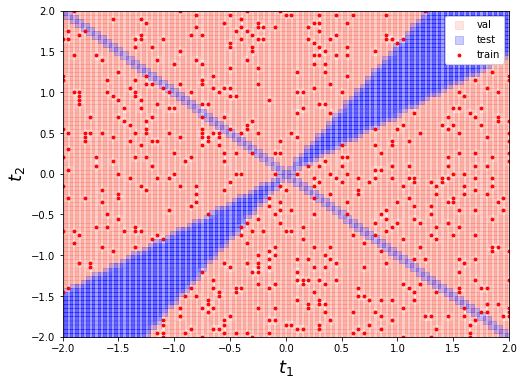

In [14]:
fig_params={"figsize": (8,6)} 
val_params={"marker": "s", "s": 64, "alpha": 0.2, "color": "salmon", "label": "val"}
test_params={"marker": "s", "s": 64, "alpha": 0.2, "color": "blue", "label": "test"}
train_params={"marker": "o", "s": 8, "color": "red", "label": "train"}
legend_params={"framealpha": 1}
xlabel_params={"xlabel": "$t_1$", "fontsize": 18}
ylabel_params={"ylabel": "$t_2$", "fontsize": 18}
title_params={}
savefig_params = {}
simulation.visualize_scatter_2d(fig_params = fig_params, val_params = val_params, test_params = test_params,\
                                train_params = train_params, legend_params = legend_params, \
                                xlabel_params = xlabel_params, ylabel_params = ylabel_params, title_params = title_params,\
                               savefig_params = savefig_params)

# Analyzing simulation data

In [15]:
%load_ext autoreload
%autoreload 2
from data_analysis import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Testing Experiment class

In [16]:
#simulation_dir = "./simulation/fig1b-6561-100"
simulation_dir = "/home/rio/data/phase_transitions/simulations/first_neighbours_open_6561_110"
experiment_name = "0"
experiment = Experiment(simulation_dir, experiment_name)

/home/rio/anaconda3/envs/phase_transitions/lib/python3.7/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


#### Viewing Train/Val/Test split

In [17]:
experiment.print_train_val_test()

% train:  0.08306660570035056
% val:  0.747599451303155
% test:  0.16933394299649443
% train + val + test:  1.0


number of train hamiltonians:  545
number of val hamiltonians:  4905
number of test hamiltonians:  1111
total number of hamiltonians:  6561


#### Viewing dataset summary

In [18]:
experiment.print_phases()

Summary of train + val data

% train/val phases: 
0    0.514495
1    0.485505
Name: phase, dtype: float64


total train/val phases: 
0    2804
1    2646
Name: phase, dtype: int64


Summary of test data

% test phases: 
0    0.50135
1    0.49865
Name: phase, dtype: float64


total test phases: 
0    557
1    554
Name: phase, dtype: int64


Summary of train + val + test data

% phases: 
0    0.512269
1    0.487731
Name: phase, dtype: float64


total phases: 
0    3361
1    3200
Name: phase, dtype: int64


#### Viewing eigenvector summary

In [19]:
experiment.eigenvector_summary.head()

,id,phase,pred_phase,type_of
0,0,0,1,test
1,0,0,0,test
2,0,0,1,test
3,0,0,0,test
4,0,0,0,test


#### Vieweng Hamiltonian summary

In [20]:
experiment.hamiltonian_summary.head()

,t1,t2,type_of,0,1,phase,pred_phase
id,,,,,,,
0,-2.0,-2.00,test,0.668182,0.331818,0,0
1,-2.0,-1.95,test,0.818182,0.181818,0,0
2,-2.0,-1.90,test,0.850000,0.150000,0,0
3,-2.0,-1.85,test,0.890909,0.109091,0,0
4,-2.0,-1.80,test,0.922727,0.077273,0,0


#### Viewing accuracy

In [21]:
experiment.accuracy

{'eigenvector_train': 1.0,
 'eigenvector_val': 0.9988175331294598,
 'eigenvector_test': 0.7659193192046477,
 'hamiltonian_train': 1.0,
 'hamiltonian_val': 1.0,
 'hamiltonian_test': 0.990999099909991}

#### Visualizing train/val/test splits with scatter plot

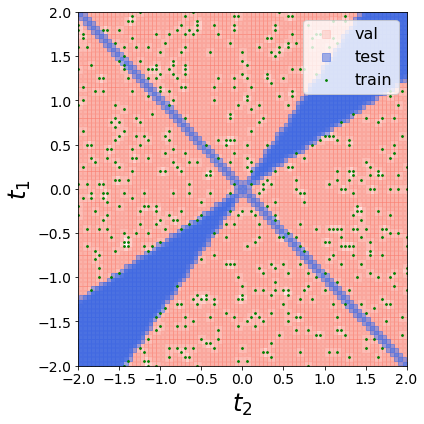

In [22]:
#fig_params={"figsize": (8,6)} 
fig_params = fig_params={"figsize": (6,6)} 
#val_params={"marker": "s", "s": 64, "alpha": 0.2, "color": "salmon", "label": "val"}
#test_params={"marker": "s", "s": 64, "alpha": 0.2, "color": "blue", "label": "test"}
#train_params={"marker": "o", "s": 10, "color": "red", "label": "train"}
val_params={"marker": "s", "s": 64, "alpha": 0.2, "color": "salmon", "label": "val"}
test_params={"marker": "s", "s": 64, "alpha": 0.5, "color": "royalblue", "label": "test"}
train_params={"marker": "o", "s": 3, "alpha": 1, "color": "green", "label": "train"}
legend_params={"framealpha": 0.8, "loc": "upper right", "fontsize": 16}
xlabel_params={"xlabel": "$t_2$", "fontsize": 24}
ylabel_params={"ylabel": "$t_1$", "fontsize": 24}
title_params={}
xlim_params = {"left": np.min(experiment.t2), "right": np.max(experiment.t2)}
ylim_params = {"bottom": np.min(experiment.t1), "top": np.max(experiment.t1)}
xticks_params = {"fontsize": 14}
yticks_params = {"fontsize": 14}
tight_params = {}
#savefig_params = {"fname": os.path.join(experiment.simulation_dir, "fig1a-6561_train_val_test_0.png")}
path_to_save = "/home/rio/1901.01963/first_neighbours_open_6561_110_train_val_test_split_experiment_0.png"
savefig_params = {"fname": path_to_save}
experiment.scatter_train_val_test(val_params, test_params, train_params, legend_params, fig_params, xlabel_params, \
                               ylabel_params, title_params, xlim_params, ylim_params, xticks_params, yticks_params,\
                                 tight_params, savefig_params)

#### Plotting train winding labels with scatter plot

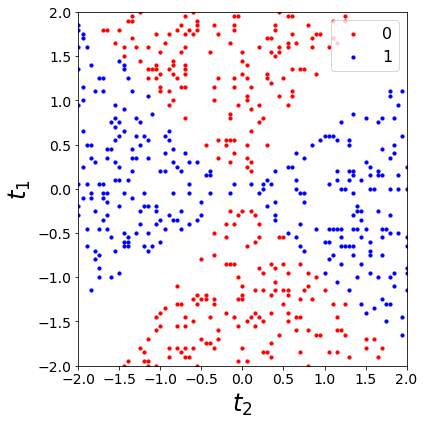

In [23]:
#fig_params={"figsize": (8,6)} 
fig_params = fig_params={"figsize": (6,6)} 
winding_params = {0: {"marker": "o", "s": 10, "color": "red", "label": 0}, \
                  1: {"marker": "o", "s": 10, "color": "blue", "label": 1}, \
                  }
legend_params={"framealpha": 0.8, "loc": "upper right", "fontsize": 16}
xlabel_params={"xlabel": "$t_2$", "fontsize": 24}
ylabel_params={"ylabel": "$t_1$", "fontsize": 24}
title_params={}
xlim_params = {"left": np.min(experiment.t2), "right": np.max(experiment.t2)}
ylim_params = {"bottom": np.min(experiment.t1), "top": np.max(experiment.t1)}
xticks_params = {"fontsize": 14}
yticks_params = {"fontsize": 14}
tight_params = {}
path_to_save = "/home/rio/1901.01963/first_neighbours_open_6561_110_train_winding_labels_experiment_0.png"
savefig_params = {"fname": path_to_save}
experiment.scatter_winding_train(winding_params, legend_params, fig_params, xlabel_params, ylabel_params, \
                                 title_params,  xlim_params, ylim_params, xticks_params, yticks_params, \
                                 tight_params, savefig_params)

#### Plotting prediction grid with pcolormesh

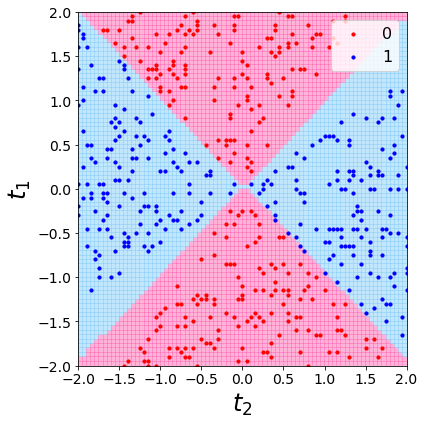

In [24]:
#fig_params, winding_params, contourf_params, legend_params, xlabel_params, ylabel_params, title_params, savefig_params)
#fig_params={"figsize": (8,6)} 
fig_params = fig_params={"figsize": (6,6)}
#winding_params = {-1: {"marker": "o", "s": 10, "color": "red", "label": -1}, 
#                  0: {"marker": "o", "s": 10, "color": "darkorange", "label": 0}, \
#                  1: {"marker": "o", "s": 10, "color": "green", "label": 1}, \
#                  2: {"marker": "o", "s": 10, "color": "blue", "label": 2}}
winding_params = {0: {"marker": "o", "s": 10, "color": "red", "label": 0}, 
                  1: {"marker": "o", "s": 10, "color": "blue", "label": 1}}

#pcolormesh_params = {"cmap": ListedColormap(["hotpink", "orange", "lightgreen","lightskyblue"]), "alpha": 0.5}
pcolormesh_params = {"cmap": ListedColormap(["hotpink", "lightskyblue"]), "alpha": 0.5}
legend_params={"framealpha": 0.8, "loc": "upper right", "fontsize": 16}
xlabel_params={"xlabel": "$t_2$", "fontsize": 24}
ylabel_params={"ylabel": "$t_1$", "fontsize": 24}
title_params={}
xlim_params = {"left": np.min(experiment.t2), "right": np.max(experiment.t2)}
ylim_params = {"bottom": np.min(experiment.t1), "top": np.max(experiment.t1)}
xticks_params = {"fontsize": 14}
yticks_params = {"fontsize": 14}
tight_params = {}
path_to_save = "/home/rio/1901.01963/first_neighbours_open_6561_110_prediction_grid_experiment_0.png"
savefig_params = {"fname": os.path.join(experiment.simulation_dir, path_to_save)}
experiment.pcolormesh_prediction_grid(winding_params, pcolormesh_params, legend_params, fig_params, xlabel_params, \
                                ylabel_params, title_params, xlim_params, ylim_params, xticks_params, yticks_params, \
                                      tight_params,  savefig_params)

#### Plotting Winding Heatmaps

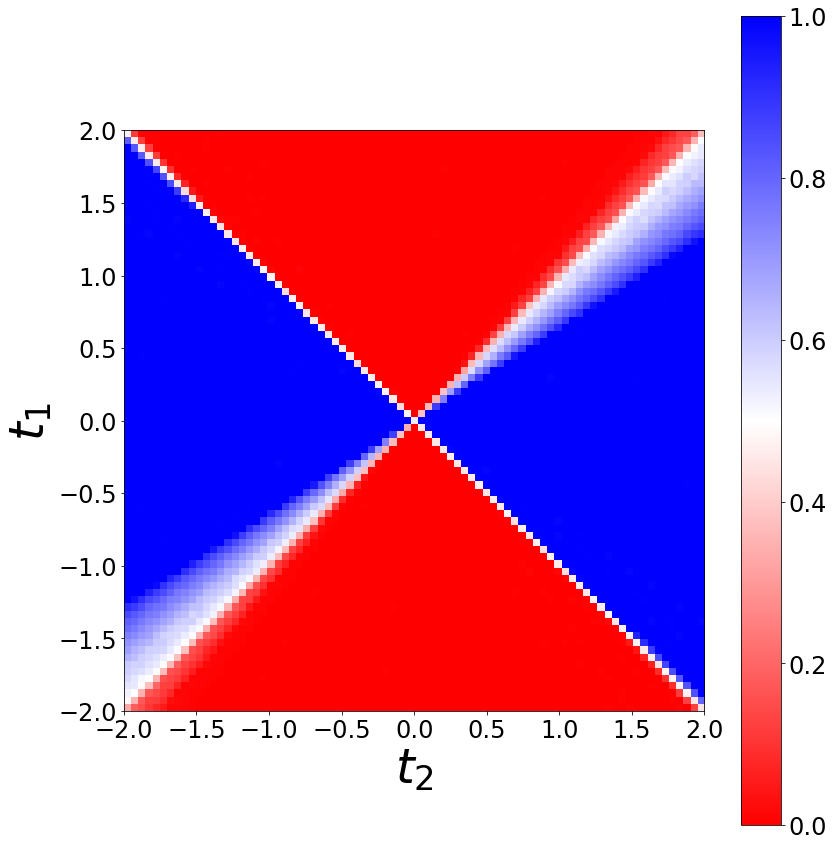

In [25]:
winding = 1
imshow_params = {"cmap": "bwr_r", "aspect": "equal", "alpha": None, "origin": "lower", "extent": [-2,2,-2,2],\
                "vmin": 0, "vmax":1}
colorbar_params={"mappable": None, "labelsize": 24}
##########
fig_params = {"figsize": (12,12)}
xlabel_params={"xlabel": "$t_2$", "fontsize": 48}
ylabel_params={"ylabel": "$t_1$", "fontsize": 48}
title_params={}
xlim_params = {"left": np.min(experiment.t2), "right": np.max(experiment.t2)}
ylim_params = {"bottom": np.min(experiment.t1), "top": np.max(experiment.t1)}
xticks_params = {"fontsize": 24}
yticks_params = {"fontsize": 24}
tight_params = {}
path_to_save = False
savefig_params = {}
experiment.imshow_winding_grid(winding, imshow_params, colorbar_params, fig_params, xlabel_params, \
                               ylabel_params, title_params, xlim_params, ylim_params, xticks_params, yticks_params, \
                               tight_params, savefig_params)

## Testing ExperimentEnsemble Class

In [26]:
simulation_dir = "/home/rio/data/phase_transitions/simulations/first_neighbours_open_6561_110"
n_experiments = None
load_hamiltonian_summary = False
simulation = ExperimentEnsemble(simulation_dir, n_experiments, load_hamiltonian_summary)

#### Computing Hamiltonian summary

In [27]:
simulation.compute_hamiltonian_summary()

majority vote: 100%|██████████| 6561/6561 [00:00<00:00, 124880.10it/s]


#### Plotting simulation winding heatmaps

Skipping winding 0
Plotting winding 1


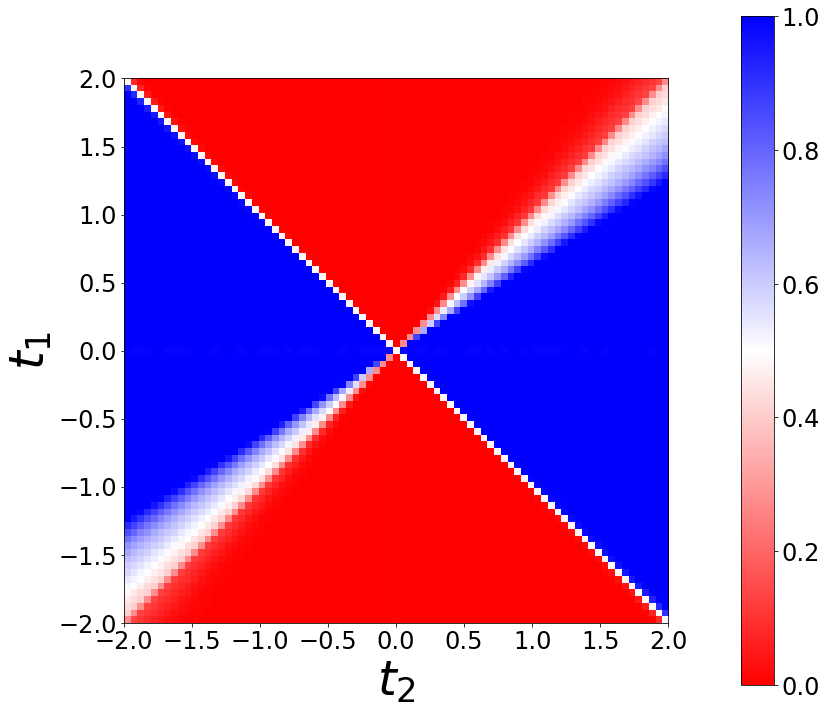

In [28]:
winding_params = {1: {"cmap": "bwr_r", "aspect": "equal", "alpha": None, "origin": "lower", "extent": [-2,2,-2,2], \
                  "vmin": 0, "vmax": 1}}
#colorbar_params={"mappable": None, "ticks": np.linspace(0,1,6), "orientation": "vertical", "pad": 0.1, "shrink": 0.8}
colorbar_params={1: {"mappable": None, "labelsize": 24, "ticks": [0, 0.2, 0.4, 0.6, 0.8, 1.0], "pad": 0.1, "shrink": 0.8, \
                     "extend": "neither"}}
#"ticks": [0, 0.2, 0.4, 0.6, 0.8, 1.0]
##########
fig_params = {"figsize": (12,12)}
xlabel_params={"xlabel": "$t_2$", "fontsize": 48}
ylabel_params={"ylabel": "$t_1$", "fontsize": 48}
title_params={}
xlim_params = {"left": np.min(simulation.t2), "right": np.max(simulation.t2)}
ylim_params = {"bottom": np.min(simulation.t1), "top": np.max(simulation.t1)}
xticks_params = {"fontsize": 24}
yticks_params = {"fontsize": 24}
tight_params = {}
path_to_save = "/home/rio/1901.01963/first_neighbours_open_6561_110_simulation_merged_winding_grid.png"
savefig_params = {"fname": path_to_save}
simulation.merge_imshow_winding_grids(winding_params, colorbar_params, fig_params, xlabel_params, ylabel_params, \
                                      title_params, xlim_params, ylim_params, xticks_params, yticks_params,  \
                                      tight_params, savefig_params)

#### Computing mean accuracies

In [29]:
save_to_disk = True
simulation.compute_mean_accuracy(save_to_disk=save_to_disk)
simulation.mean_accuracy

computing mean accuracies: 100%|██████████| 100/100 [00:30<00:00,  3.25it/s]


{'eigenvector_train': 1.0,
 'eigenvector_val': 0.998966249652488,
 'eigenvector_test': 0.7374194010310123,
 'hamiltonian_train': 1.0,
 'hamiltonian_val': 1.0,
 'hamiltonian_test': 0.8360306030603062}

#### Computing bootstrap accuracies

In [30]:
save_to_disk = True
simulation.compute_bootstrap_accuracy(save_to_disk=save_to_disk)
simulation.bootstrap_accuracy

{'hamiltonian_train': 1.0,
 'hamiltonian_val': 1.0,
 'hamiltonian_test': 0.8811881188118812}

#### Computing mean feature importances

In [31]:
import operator
save_to_disk = False
simulation.compute_mean_feature_importance(save_to_disk=save_to_disk)
### Sorted feature importances from highest to lowest
sorted_feature_importances = sorted(simulation.feature_importance.items(), key=operator.itemgetter(1),reverse=True)
print("Sorted feature importances: ", sorted_feature_importances)

mean feature importances: 100%|██████████| 100/100 [00:00<00:00, 2020.48it/s]

Sorted feature importances:  [(218, 0.26496484555893285), (72, 0.11395990424974702), (1, 0.05869958121206703), (214, 0.05850057297434399), (219, 0.05304477475147268), (109, 0.05215635247888074), (110, 0.03725617977625846), (108, 0.03566430236554799), (111, 0.03298294043719534), (147, 0.03289484609273075), (0, 0.02593811462544664), (210, 0.016959896444768766), (5, 0.01451780654730512), (146, 0.010750883538136673), (2, 0.006444302829352056), (9, 0.005353186569171763), (73, 0.0046776902431325445), (70, 0.00413564121398317), (37, 0.0035650082840591), (14, 0.0035206116650991536), (193, 0.0034007721825781), (182, 0.003206025989099853), (26, 0.003136883641371181), (206, 0.0029630491579199863), (217, 0.0027397883689096085), (208, 0.002730045004185749), (205, 0.0025409367394718346), (74, 0.002361636910271006), (49, 0.0021368862272413925), (170, 0.002109773641418072), (112, 0.0020911828296711872), (216, 0.001969895575215765), (78, 0.0019680372654614733), (66, 0.001967172596542143), (137, 0.00196

#### Plotting feature importances

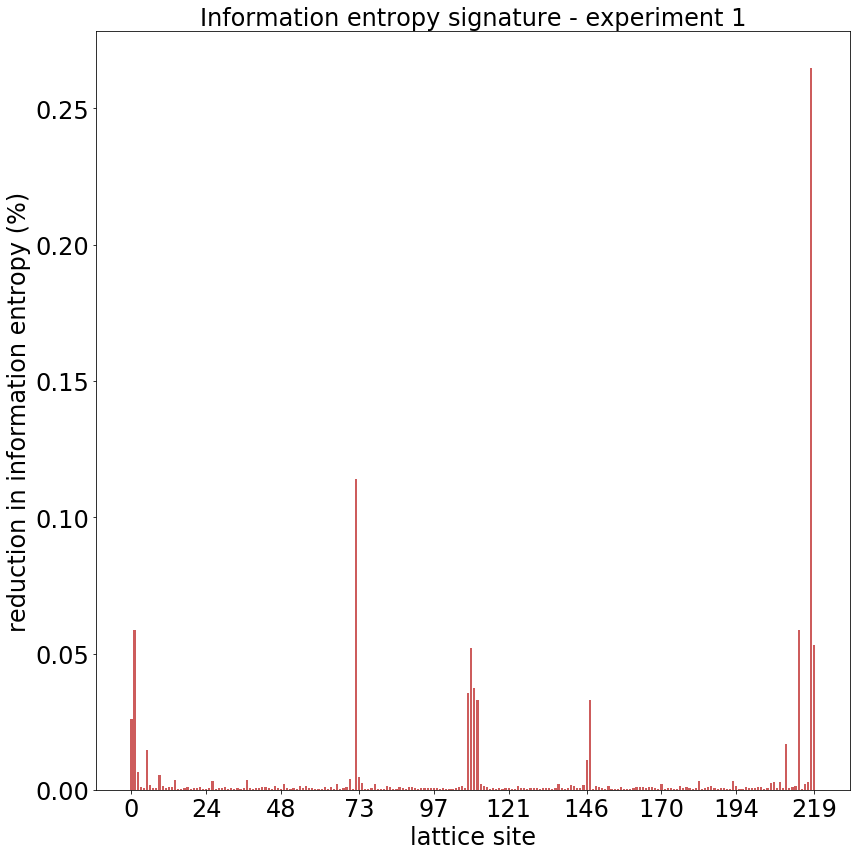

In [33]:
#plot_feature_importances(self, n_features=None, fig_params={}, xlabel_params={}, ylabel_params={}, title_params={})
n_features = None
plot_type = "bar"
plot_params = {"color": "indianred", "width": 0.7}
#plot_params=None
#hist_params = {"color": "tomato", "width": 0.7}
#hist_params = None
hist_precision = 1000
fig_params={"figsize": (12,12)} 
xlabel_params = {"xlabel": "lattice site", "fontsize": 24}
ylabel_params = {"ylabel": "reduction in information entropy (%)", "fontsize": 24}
title_params = {"label": "Information entropy signature - experiment 1", "fontsize": 24}
#title_params = {"label": "Lattice site importances", "fontsize": 20}
#xlim_params = {"left": 0, "right": len(simulation.feature_importance)}
#ylim_params = {"bottom": 0, "top": 0.2}
#xlim_params = {"left": 0, "right": 99}
xlim_params = {}
ylim_params = {}
xticks_params = {"ticks": np.linspace(0,219,10).astype(int), "fontsize": 24}
#xticks_params = {}
yticks_params = {"fontsize": 24}
tight_params = {}
path_to_save = "/home/rio/1901.01963/first_neighbours_open_6561_110_feature_importances.png"
savefig_params = {"fname": path_to_save}
simulation.plot_feature_importances(n_features, plot_type,  hist_precision, plot_params, fig_params,\
                                    xlabel_params, ylabel_params, title_params, xlim_params, \
                                    ylim_params, xticks_params, yticks_params, tight_params, savefig_params)

#### Plotting cumulative feature importances

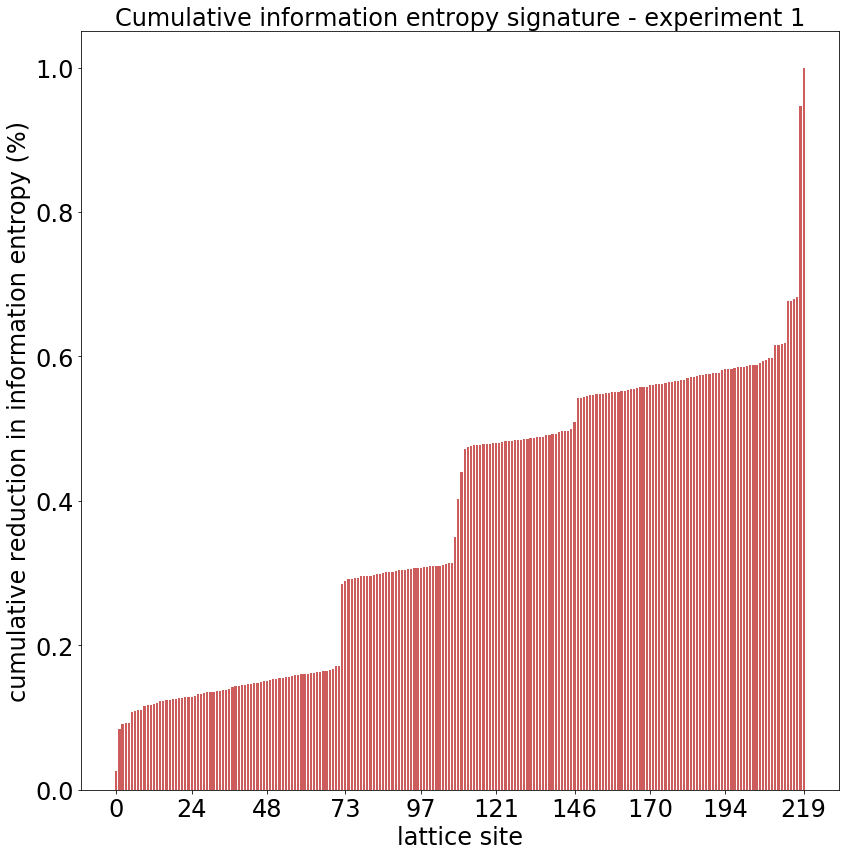

In [34]:
n_features = None
plot_type = "bar"
hist_precision = 1000
plot_params = {"color":"indianred", "width": 0.7}
fig_params={"figsize": (12,12)}
xlabel_params = {"xlabel": "lattice site", "fontsize": 24}
ylabel_params = {"ylabel": "cumulative reduction in information entropy (%)", "fontsize": 24}
title_params = {"label": "Cumulative information entropy signature - experiment 1", "fontsize": 24}
#title_params = {"label": "Lattice site importances", "fontsize": 20}
#xlim_params = {"left": 0, "right": len(simulation.feature_importance)}
#ylim_params = {"bottom": 0, "top": 0.2}
#xlim_params = {"left": 0, "right": 99}
#xlim_params = {"left":-1, "right":100}
xlim_params = {}
ylim_params = {}
#xticks_params = {"ticks": np.array(list(simulation.cumulative_feature_importance.keys()))[np.linspace(0,99,16).astype(int)] }
xticks_params = {"ticks": np.linspace(0,219,10).astype(int), "fontsize": 24}
yticks_params = {"fontsize": 24}
path_to_save = "/home/rio/1901.01963/first_neighbours_open_6561_219_cumulative_feature_importances.png"
savefig_params = {"fname": path_to_save}
simulation.plot_cumulative_feature_importances(n_features, plot_type,  hist_precision, plot_params, fig_params,\
                                    xlabel_params, ylabel_params, title_params, xlim_params, \
                                    ylim_params, xticks_params, yticks_params, tight_params, savefig_params)


# Running simulation with most relevant features: 72,218

We now rerun the simulations using the most relevant features only

In [35]:
%%time
%load_ext autoreload
%autoreload 2
from simulation import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
CPU times: user 262 µs, sys: 4 µs, total: 266 µs
Wall time: 167 µs


In [37]:
%%time
### YOU MAY NEED TO CHANGE THE CSV FILENAME!
csv_path = "/home/rio/data/phase_transitions/csv/first_neighbours_open_6561_110.csv"           
model = DecisionTreeClassifier(criterion="entropy")
########## YOU MAY NEED TO CHANGE THE ALLOWED WINDINGS!
allowed_windings = [0,1]
########## YOU MAY NEED TO CHANGE THE SIMULATION DIR!
simulation_dir = "/home/rio/data/phase_transitions/simulations/first_neighbours_open_6561_110_feat_72_218"
########## YOU MAY NEED TO CHANGE VALIDATION SPLIT!
val_split = 0.9  
########## YOU MAY NEED TO CHANGE WHICH FEATURES TO USE
features_to_use = [72,218]
#features_to_use = [0,50]
########## YOU MAY NEED TO SHUFFLE FEATURES
shuffle_features = False
########## YOU MAY NEED TO CHANGE THE SEED!
random_state = 137                    
########## YOU MAY NEED TO CHANGE THE SIMULATION PATH!
dict_args = {"csv_path": csv_path, "model": model, "allowed_windings": allowed_windings,\
             "simulation_dir": simulation_dir, "val_split": val_split, "features_to_use": features_to_use,\
             "shuffle_features": shuffle_features, "random_state": random_state}

#Starting an instance of Simulation with a decision tree
simulation = Simulation(**dict_args)
#

print("Info on all data: \n")
simulation.dataframe.info()
simulation.dataframe.head()

Info on all data: 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1443420 entries, 0 to 1443419
Columns: 228 entries, id to feat219
dtypes: float64(223), int32(3), object(2)
memory usage: 2.4+ GB
CPU times: user 32.2 s, sys: 1.53 s, total: 33.7 s
Wall time: 32.4 s


,id,path,t1,t2,winding,phase,pred_phase,type_of,feat0,feat1,...,feat210,feat211,feat212,feat213,feat214,feat215,feat216,feat217,feat218,feat219
0,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,0,666,test,-0.002704,0.001352,...,-0.012138,0.013478,-0.009451,0.010795,-0.006756,0.008104,-0.004056,0.005406,-0.001352,0.002704
1,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,0,666,test,-0.005406,0.002704,...,0.024077,-0.026683,0.018808,-0.021451,0.013478,-0.016149,0.008104,-0.010795,0.002704,-0.005406
2,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,0,666,test,-0.008104,0.004056,...,-0.035623,0.039351,-0.027979,0.031829,-0.020131,0.024077,-0.012138,0.016149,-0.004056,0.008104
3,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,0,666,test,0.010795,-0.005406,...,-0.046586,0.051224,-0.036873,0.041797,-0.026683,0.031829,-0.016149,0.021451,-0.005406,0.010795
4,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,0,666,test,-0.013478,0.006756,...,-0.056788,0.062064,-0.045402,0.051224,-0.033101,0.039351,-0.020131,0.026683,-0.006756,0.013478


### Running simulation

In [38]:
#running a simulation
n_experiments = 100
start_n = 0
fit_params = None
shuffle_rows = True
pred_params = None
random_features = False
######### DON'T SET THIS TO TRUE UNLESS YOUR DATASET IS SMALL!! WILL FLOOD YOUR MEMORY!!!
store_in_lists = False  
########## BELOW ARE THE PARAMETERS THAT CONTROL WHAT WILL BE SAVED
save_eigenvector=True
save_hamiltonian=True 
save_accuracy=True 
save_model=True
########## RUNNING SIMULATION
simulation.run_simulation(n_experiments, start_n, fit_params, shuffle_rows, pred_params, random_features,\
                          store_in_lists, save_eigenvector, save_hamiltonian, save_accuracy, save_model)

simulation.dataframe.head(10)

running experiments: 100%|██████████| 100/100 [08:47<00:00,  5.05s/it]


,id,path,t1,t2,winding,phase,pred_phase,type_of,feat0,feat1,...,feat210,feat211,feat212,feat213,feat214,feat215,feat216,feat217,feat218,feat219
0,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,0,0,test,-0.002704,0.001352,...,-0.012138,0.013478,-0.009451,0.010795,-0.006756,0.008104,-0.004056,0.005406,-0.001352,0.002704
1,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,0,0,test,-0.005406,0.002704,...,0.024077,-0.026683,0.018808,-0.021451,0.013478,-0.016149,0.008104,-0.010795,0.002704,-0.005406
2,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,0,1,test,-0.008104,0.004056,...,-0.035623,0.039351,-0.027979,0.031829,-0.020131,0.024077,-0.012138,0.016149,-0.004056,0.008104
3,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,0,0,test,0.010795,-0.005406,...,-0.046586,0.051224,-0.036873,0.041797,-0.026683,0.031829,-0.016149,0.021451,-0.005406,0.010795
4,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,0,0,test,-0.013478,0.006756,...,-0.056788,0.062064,-0.045402,0.051224,-0.033101,0.039351,-0.020131,0.026683,-0.006756,0.013478
5,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,0,1,test,0.016149,-0.008104,...,-0.066061,0.071653,-0.053482,0.059990,-0.039351,0.046586,-0.024077,0.031829,-0.008104,0.016149
6,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,0,1,test,0.018808,-0.009451,...,0.074255,-0.079795,0.061033,-0.067981,0.045402,-0.053482,0.027979,-0.036873,0.009451,-0.018808
7,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,0,0,test,-0.021451,0.010795,...,0.081235,-0.086328,0.067981,-0.075093,0.051224,-0.059990,0.031829,-0.041797,0.010795,-0.021451
8,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,0,0,test,-0.024077,0.012138,...,-0.086888,0.091119,-0.074255,0.081235,-0.056788,0.066061,-0.035623,0.046586,-0.012138,0.024077
9,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,0,0,test,0.002704,0.001352,...,0.012138,0.013478,0.009451,0.010795,0.006756,0.008104,0.004056,0.005406,0.001352,0.002704


#### Loading simulation

In [39]:
simulation_dir = "/home/rio/data/phase_transitions/simulations/first_neighbours_open_6561_110_feat_72_218"
n_experiments = None
load_hamiltonian_summary = False
simulation = ExperimentEnsemble(simulation_dir, n_experiments, load_hamiltonian_summary)

/home/rio/anaconda3/envs/phase_transitions/lib/python3.7/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


#### Computing Hamiltonian summary

In [40]:
simulation.n_experiments

100

In [41]:
simulation.compute_hamiltonian_summary()

majority vote: 100%|██████████| 6561/6561 [00:00<00:00, 130703.46it/s]


#### Computing mean accuracies with less features

In [42]:
simulation.n_experiments

100

In [43]:
save_to_disk = True
simulation.compute_mean_accuracy(save_to_disk)
simulation.mean_accuracy

computing mean accuracies: 100%|██████████| 100/100 [00:31<00:00,  3.25it/s]


{'eigenvector_train': 0.9870625521267723,
 'eigenvector_val': 0.9814079047354278,
 'eigenvector_test': 0.6774599869077816,
 'hamiltonian_train': 0.9876513761467891,
 'hamiltonian_val': 0.9850621814475027,
 'hamiltonian_test': 0.7309630963096312}

#### Plotting heatmap for less features

Skipping winding 0
Plotting winding 1


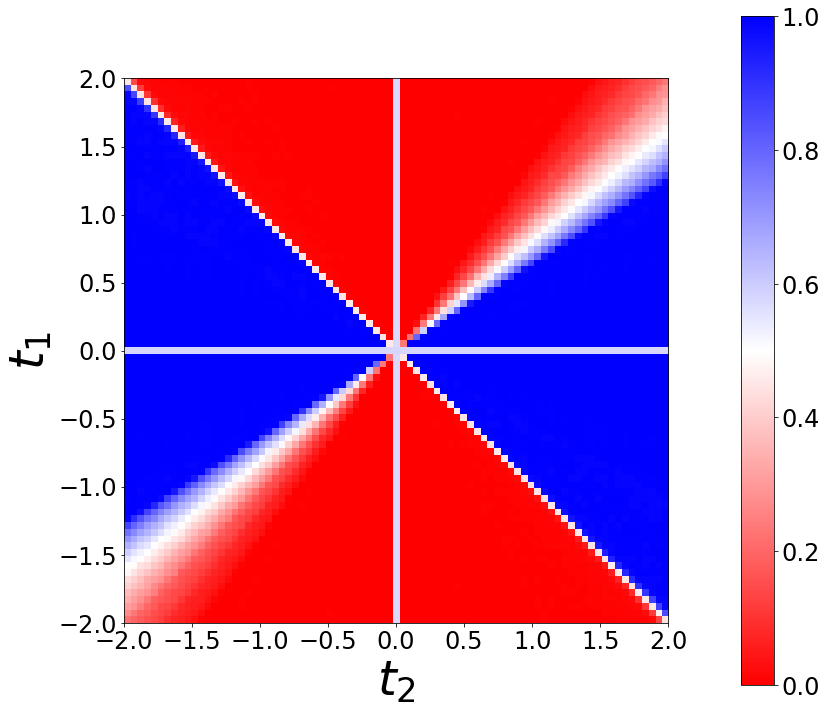

In [44]:
winding_params = {1: {"cmap": "bwr_r", "aspect": "equal", "alpha": None, "origin": "lower", "extent": [-2,2,-2,2], \
                  "vmin": 0, "vmax": 1}}
#colorbar_params={"mappable": None, "ticks": np.linspace(0,1,6), "orientation": "vertical", "pad": 0.1, "shrink": 0.8}
colorbar_params={1: {"mappable": None, "labelsize": 24, "ticks": [0, 0.2, 0.4, 0.6, 0.8, 1.0], "pad": 0.1, "shrink": 0.8, \
                     "extend": "neither"}}
#"ticks": [0, 0.2, 0.4, 0.6, 0.8, 1.0]
##########
fig_params = {"figsize": (12,12)}
xlabel_params={"xlabel": "$t_2$", "fontsize": 48}
ylabel_params={"ylabel": "$t_1$", "fontsize": 48}
title_params={}
xlim_params = {"left": np.min(simulation.t2), "right": np.max(simulation.t2)}
ylim_params = {"bottom": np.min(simulation.t1), "top": np.max(simulation.t1)}
xticks_params = {"fontsize": 24}
yticks_params = {"fontsize": 24}
tight_params = {}
path_to_save = "/home/rio/1901.01963/first_neighbours_open_6561_90_feat_72_218_simulation_merged_winding_grid.png"
savefig_params = {"fname": path_to_save}
simulation.merge_imshow_winding_grids(winding_params, colorbar_params, fig_params, xlabel_params, ylabel_params, \
                                      title_params, xlim_params, ylim_params, xticks_params, yticks_params,  \
                                      tight_params, savefig_params)

# Running simulation with most relevant features: 1,218

In [45]:
%%time
%load_ext autoreload
%autoreload 2
from simulation import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
CPU times: user 924 µs, sys: 24 µs, total: 948 µs
Wall time: 516 µs


In [46]:
%%time
### YOU MAY NEED TO CHANGE THE CSV FILENAME!
csv_path = "/home/rio/data/phase_transitions/csv/first_neighbours_open_6561_110.csv"           
model = DecisionTreeClassifier(criterion="entropy")
########## YOU MAY NEED TO CHANGE THE ALLOWED WINDINGS!
allowed_windings = [0,1]
########## YOU MAY NEED TO CHANGE THE SIMULATION DIR!
simulation_dir = "/home/rio/data/phase_transitions/simulations/first_neighbours_open_6561_110_feat_1_218"
########## YOU MAY NEED TO CHANGE VALIDATION SPLIT!
val_split = 0.9  
########## YOU MAY NEED TO CHANGE WHICH FEATURES TO USE
features_to_use = [1,218]
#features_to_use = [0,50]
########## YOU MAY NEED TO SHUFFLE FEATURES
shuffle_features = False
########## YOU MAY NEED TO CHANGE THE SEED!
random_state = 137                    
########## YOU MAY NEED TO CHANGE THE SIMULATION PATH!
dict_args = {"csv_path": csv_path, "model": model, "allowed_windings": allowed_windings,\
             "simulation_dir": simulation_dir, "val_split": val_split, "features_to_use": features_to_use,\
             "shuffle_features": shuffle_features, "random_state": random_state}

#Starting an instance of Simulation with a decision tree
simulation = Simulation(**dict_args)
#

print("Info on all data: \n")
simulation.dataframe.info()
simulation.dataframe.head()

Info on all data: 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1443420 entries, 0 to 1443419
Columns: 228 entries, id to feat219
dtypes: float64(223), int32(3), object(2)
memory usage: 2.4+ GB
CPU times: user 32.7 s, sys: 1.55 s, total: 34.2 s
Wall time: 32.9 s


,id,path,t1,t2,winding,phase,pred_phase,type_of,feat0,feat1,...,feat210,feat211,feat212,feat213,feat214,feat215,feat216,feat217,feat218,feat219
0,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,0,666,test,-0.002704,0.001352,...,-0.012138,0.013478,-0.009451,0.010795,-0.006756,0.008104,-0.004056,0.005406,-0.001352,0.002704
1,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,0,666,test,-0.005406,0.002704,...,0.024077,-0.026683,0.018808,-0.021451,0.013478,-0.016149,0.008104,-0.010795,0.002704,-0.005406
2,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,0,666,test,-0.008104,0.004056,...,-0.035623,0.039351,-0.027979,0.031829,-0.020131,0.024077,-0.012138,0.016149,-0.004056,0.008104
3,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,0,666,test,0.010795,-0.005406,...,-0.046586,0.051224,-0.036873,0.041797,-0.026683,0.031829,-0.016149,0.021451,-0.005406,0.010795
4,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,0,666,test,-0.013478,0.006756,...,-0.056788,0.062064,-0.045402,0.051224,-0.033101,0.039351,-0.020131,0.026683,-0.006756,0.013478


### Running simulation

In [47]:
#running a simulation
n_experiments = 100
start_n = 0
fit_params = None
shuffle_rows = True
pred_params = None
random_features = False
######### DON'T SET THIS TO TRUE UNLESS YOUR DATASET IS SMALL!! WILL FLOOD YOUR MEMORY!!!
store_in_lists = False  
########## BELOW ARE THE PARAMETERS THAT CONTROL WHAT WILL BE SAVED
save_eigenvector=True
save_hamiltonian=True 
save_accuracy=True 
save_model=True
########## RUNNING SIMULATION
simulation.run_simulation(n_experiments, start_n, fit_params, shuffle_rows, pred_params, random_features,\
                          store_in_lists, save_eigenvector, save_hamiltonian, save_accuracy, save_model)

simulation.dataframe.head(10)

running experiments: 100%|██████████| 100/100 [10:05<00:00,  6.28s/it]


,id,path,t1,t2,winding,phase,pred_phase,type_of,feat0,feat1,...,feat210,feat211,feat212,feat213,feat214,feat215,feat216,feat217,feat218,feat219
0,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,0,1,test,-0.002704,0.001352,...,-0.012138,0.013478,-0.009451,0.010795,-0.006756,0.008104,-0.004056,0.005406,-0.001352,0.002704
1,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,0,1,test,-0.005406,0.002704,...,0.024077,-0.026683,0.018808,-0.021451,0.013478,-0.016149,0.008104,-0.010795,0.002704,-0.005406
2,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,0,1,test,-0.008104,0.004056,...,-0.035623,0.039351,-0.027979,0.031829,-0.020131,0.024077,-0.012138,0.016149,-0.004056,0.008104
3,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,0,1,test,0.010795,-0.005406,...,-0.046586,0.051224,-0.036873,0.041797,-0.026683,0.031829,-0.016149,0.021451,-0.005406,0.010795
4,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,0,1,test,-0.013478,0.006756,...,-0.056788,0.062064,-0.045402,0.051224,-0.033101,0.039351,-0.020131,0.026683,-0.006756,0.013478
5,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,0,1,test,0.016149,-0.008104,...,-0.066061,0.071653,-0.053482,0.059990,-0.039351,0.046586,-0.024077,0.031829,-0.008104,0.016149
6,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,0,1,test,0.018808,-0.009451,...,0.074255,-0.079795,0.061033,-0.067981,0.045402,-0.053482,0.027979,-0.036873,0.009451,-0.018808
7,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,0,0,test,-0.021451,0.010795,...,0.081235,-0.086328,0.067981,-0.075093,0.051224,-0.059990,0.031829,-0.041797,0.010795,-0.021451
8,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,0,1,test,-0.024077,0.012138,...,-0.086888,0.091119,-0.074255,0.081235,-0.056788,0.066061,-0.035623,0.046586,-0.012138,0.024077
9,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,0,1,test,0.002704,0.001352,...,0.012138,0.013478,0.009451,0.010795,0.006756,0.008104,0.004056,0.005406,0.001352,0.002704


#### Loading simulation

In [48]:
simulation_dir = "/home/rio/data/phase_transitions/simulations/first_neighbours_open_6561_110_feat_1_218"
n_experiments = None
load_hamiltonian_summary = False
simulation = ExperimentEnsemble(simulation_dir, n_experiments, load_hamiltonian_summary)

/home/rio/anaconda3/envs/phase_transitions/lib/python3.7/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


#### Computing Hamiltonian summary

In [49]:
simulation.compute_hamiltonian_summary()

majority vote: 100%|██████████| 6561/6561 [00:00<00:00, 149606.01it/s]


#### Computing mean accuracies with features 1,218

In [50]:
save_to_disk = True
simulation.compute_mean_accuracy(save_to_disk)
simulation.mean_accuracy

computing mean accuracies: 100%|██████████| 100/100 [00:31<00:00,  3.14it/s]


{'eigenvector_train': 0.9595702251876564,
 'eigenvector_val': 0.7618731072189788,
 'eigenvector_test': 0.6280354308158088,
 'hamiltonian_train': 0.9883119266055047,
 'hamiltonian_val': 0.9227991845056066,
 'hamiltonian_test': 0.7376417641764177}

#### Plotting heatmap for features 1,218

Skipping winding 0
Plotting winding 1


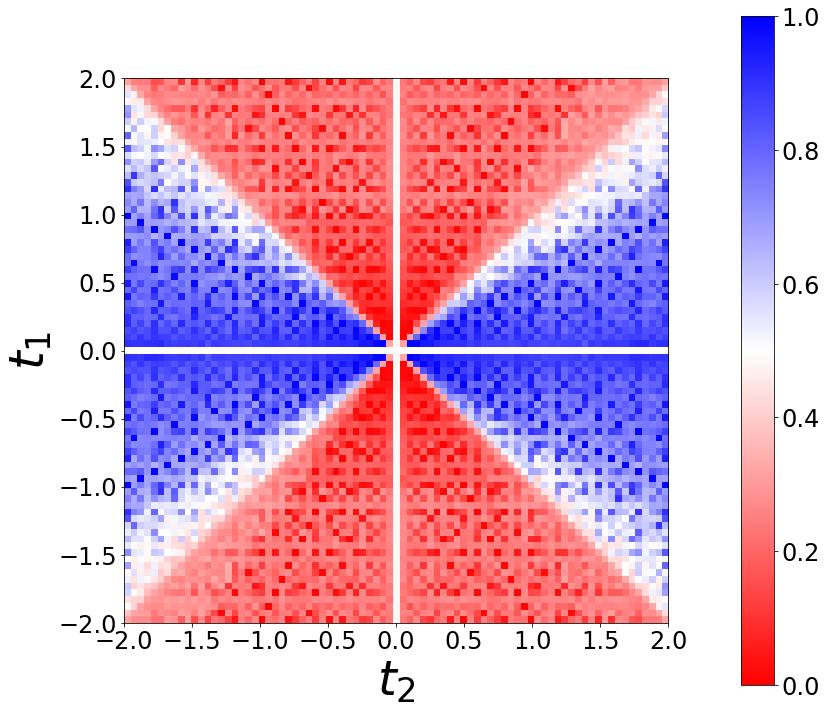

In [51]:
winding_params = {1: {"cmap": "bwr_r", "aspect": "equal", "alpha": None, "origin": "lower", "extent": [-2,2,-2,2], \
                  "vmin": 0, "vmax": 1}}
#colorbar_params={"mappable": None, "ticks": np.linspace(0,1,6), "orientation": "vertical", "pad": 0.1, "shrink": 0.8}
colorbar_params={1: {"mappable": None, "labelsize": 24, "ticks": [0, 0.2, 0.4, 0.6, 0.8, 1.0], "pad": 0.1, "shrink": 0.8, \
                     "extend": "neither"}}
#"ticks": [0, 0.2, 0.4, 0.6, 0.8, 1.0]
##########
fig_params = {"figsize": (12,12)}
xlabel_params={"xlabel": "$t_2$", "fontsize": 48}
ylabel_params={"ylabel": "$t_1$", "fontsize": 48}
title_params={}
xlim_params = {"left": np.min(simulation.t2), "right": np.max(simulation.t2)}
ylim_params = {"bottom": np.min(simulation.t1), "top": np.max(simulation.t1)}
xticks_params = {"fontsize": 24}
yticks_params = {"fontsize": 24}
tight_params = {}
path_to_save = "/home/rio/1901.01963/first_neighbours_open_6561_90_feat_1_218_simulation_merged_winding_grid.png"
savefig_params = {"fname": path_to_save}
simulation.merge_imshow_winding_grids(winding_params, colorbar_params, fig_params, xlabel_params, ylabel_params, \
                                      title_params, xlim_params, ylim_params, xticks_params, yticks_params,  \
                                      tight_params, savefig_params)

# Running simulation with random features (2 random features)

In [52]:
%%time
### YOU MAY NEED TO CHANGE THE CSV FILENAME!
csv_path = "/home/rio/data/phase_transitions/csv/first_neighbours_open_6561_110.csv"                   
model = DecisionTreeClassifier(criterion="entropy")
########## YOU MAY NEED TO CHANGE THE ALLOWED WINDINGS!
allowed_windings = [0,1]
########## YOU MAY NEED TO CHANGE THE SIMULATION DIR!
simulation_dir = "/home/rio/data/phase_transitions/simulations/first_neighbours_open_6561_110_random_feat_2"
########## YOU MAY NEED TO CHANGE VALIDATION SPLIT!
val_split = 0.9  
########## YOU MAY NEED TO CHANGE WHICH FEATURES TO USE
features_to_use = None
########## YOU MAY NEED TO SHUFFLE FEATURES
shuffle_features = False
########## YOU MAY NEED TO CHANGE THE SEED!
random_state = 137                    
########## YOU MAY NEED TO CHANGE THE SIMULATION PATH!
dict_args = {"csv_path": csv_path, "model": model, "allowed_windings": allowed_windings,\
             "simulation_dir": simulation_dir, "val_split": val_split, "features_to_use": features_to_use,\
             "shuffle_features": shuffle_features, "random_state": random_state}

#Starting an instance of Simulation with a decision tree
simulation = Simulation(**dict_args)
#

print("Info on all data: \n")
simulation.dataframe.info()
simulation.dataframe.head()

Info on all data: 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1443420 entries, 0 to 1443419
Columns: 228 entries, id to feat219
dtypes: float64(223), int32(3), object(2)
memory usage: 2.4+ GB
CPU times: user 32.1 s, sys: 1.54 s, total: 33.6 s
Wall time: 32.3 s


,id,path,t1,t2,winding,phase,pred_phase,type_of,feat0,feat1,...,feat210,feat211,feat212,feat213,feat214,feat215,feat216,feat217,feat218,feat219
0,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,0,666,test,-0.002704,0.001352,...,-0.012138,0.013478,-0.009451,0.010795,-0.006756,0.008104,-0.004056,0.005406,-0.001352,0.002704
1,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,0,666,test,-0.005406,0.002704,...,0.024077,-0.026683,0.018808,-0.021451,0.013478,-0.016149,0.008104,-0.010795,0.002704,-0.005406
2,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,0,666,test,-0.008104,0.004056,...,-0.035623,0.039351,-0.027979,0.031829,-0.020131,0.024077,-0.012138,0.016149,-0.004056,0.008104
3,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,0,666,test,0.010795,-0.005406,...,-0.046586,0.051224,-0.036873,0.041797,-0.026683,0.031829,-0.016149,0.021451,-0.005406,0.010795
4,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,0,666,test,-0.013478,0.006756,...,-0.056788,0.062064,-0.045402,0.051224,-0.033101,0.039351,-0.020131,0.026683,-0.006756,0.013478


#### Running simulation

In [53]:
#running a simulation
n_experiments = 100
start_n = 0
fit_params = None
shuffle_rows = True
pred_params = None
random_features = 2
######### DON'T SET THIS TO TRUE UNLESS YOUR DATASET IS SMALL!! WILL FLOOD YOUR MEMORY!!!
store_in_lists = False  
########## BELOW ARE THE PARAMETERS THAT CONTROL WHAT WILL BE SAVED
save_eigenvector=True
save_hamiltonian=True 
save_accuracy=True 
save_model=True
########## RUNNING SIMULATION
simulation.run_simulation(n_experiments, start_n, fit_params, shuffle_rows, pred_params, random_features, \
                          store_in_lists, save_eigenvector, save_hamiltonian, save_accuracy, save_model)

simulation.dataframe.head(10)

running experiments:   0%|          | 0/100 [00:00<?, ?it/s]

random_features:  [38 77]


running experiments:   1%|          | 1/100 [00:05<09:16,  5.62s/it]

random_features:  [  6 162]


running experiments:   2%|▏         | 2/100 [00:11<09:06,  5.57s/it]

random_features:  [179 170]


running experiments:   3%|▎         | 3/100 [00:16<09:04,  5.61s/it]

random_features:  [ 30 117]


running experiments:   4%|▍         | 4/100 [00:22<08:58,  5.61s/it]

random_features:  [219 196]


running experiments:   5%|▌         | 5/100 [00:29<09:24,  5.94s/it]

random_features:  [104  95]


running experiments:   6%|▌         | 6/100 [00:34<09:09,  5.84s/it]

random_features:  [142 176]


running experiments:   7%|▋         | 7/100 [00:40<08:53,  5.73s/it]

random_features:  [158 134]


running experiments:   8%|▊         | 8/100 [00:45<08:37,  5.63s/it]

random_features:  [179 145]


running experiments:   9%|▉         | 9/100 [00:51<08:38,  5.69s/it]

random_features:  [110 176]


running experiments:  10%|█         | 10/100 [00:57<08:39,  5.77s/it]

random_features:  [58 84]


running experiments:  11%|█         | 11/100 [01:03<08:42,  5.87s/it]

random_features:  [133  67]


running experiments:  12%|█▏        | 12/100 [01:09<08:45,  5.97s/it]

random_features:  [199 169]


running experiments:  13%|█▎        | 13/100 [01:15<08:38,  5.96s/it]

random_features:  [164  94]


running experiments:  14%|█▍        | 14/100 [01:21<08:30,  5.94s/it]

random_features:  [ 36 156]


running experiments:  15%|█▌        | 15/100 [01:27<08:19,  5.88s/it]

random_features:  [174   5]


running experiments:  16%|█▌        | 16/100 [01:33<08:11,  5.85s/it]

random_features:  [68 42]


running experiments:  17%|█▋        | 17/100 [01:38<07:50,  5.67s/it]

random_features:  [ 99 176]


running experiments:  18%|█▊        | 18/100 [01:43<07:45,  5.68s/it]

random_features:  [ 44 113]


running experiments:  19%|█▉        | 19/100 [01:49<07:36,  5.63s/it]

random_features:  [149  30]


running experiments:  20%|██        | 20/100 [01:55<07:33,  5.67s/it]

random_features:  [91 90]


running experiments:  21%|██        | 21/100 [02:00<07:25,  5.64s/it]

random_features:  [202   2]


running experiments:  22%|██▏       | 22/100 [02:06<07:19,  5.64s/it]

random_features:  [202   8]


running experiments:  23%|██▎       | 23/100 [02:12<07:15,  5.65s/it]

random_features:  [215 167]


running experiments:  24%|██▍       | 24/100 [02:17<07:02,  5.56s/it]

random_features:  [60 90]


running experiments:  25%|██▌       | 25/100 [02:23<06:59,  5.60s/it]

random_features:  [36 90]


running experiments:  26%|██▌       | 26/100 [02:28<06:50,  5.55s/it]

random_features:  [133  71]


running experiments:  27%|██▋       | 27/100 [02:34<06:45,  5.55s/it]

random_features:  [103 175]


running experiments:  28%|██▊       | 28/100 [02:39<06:38,  5.54s/it]

random_features:  [80 23]


running experiments:  29%|██▉       | 29/100 [02:45<06:39,  5.63s/it]

random_features:  [113  75]


running experiments:  30%|███       | 30/100 [02:51<06:36,  5.67s/it]

random_features:  [ 23 116]


running experiments:  31%|███       | 31/100 [02:57<06:35,  5.74s/it]

random_features:  [183  61]


running experiments:  32%|███▏      | 32/100 [03:02<06:27,  5.69s/it]

random_features:  [ 70 200]


running experiments:  33%|███▎      | 33/100 [03:08<06:18,  5.65s/it]

random_features:  [57 34]


running experiments:  34%|███▍      | 34/100 [03:13<06:11,  5.62s/it]

random_features:  [179  91]


running experiments:  35%|███▌      | 35/100 [03:19<06:03,  5.59s/it]

random_features:  [196 108]


running experiments:  36%|███▌      | 36/100 [03:24<05:53,  5.52s/it]

random_features:  [126 118]


running experiments:  37%|███▋      | 37/100 [03:30<05:50,  5.56s/it]

random_features:  [192 121]


running experiments:  38%|███▊      | 38/100 [03:36<05:47,  5.61s/it]

random_features:  [214 173]


running experiments:  39%|███▉      | 39/100 [03:42<05:52,  5.78s/it]

random_features:  [ 92 193]


running experiments:  40%|████      | 40/100 [03:48<05:46,  5.77s/it]

random_features:  [ 35 150]


running experiments:  41%|████      | 41/100 [03:53<05:39,  5.75s/it]

random_features:  [117  80]


running experiments:  42%|████▏     | 42/100 [03:59<05:33,  5.75s/it]

random_features:  [192 121]


running experiments:  43%|████▎     | 43/100 [04:05<05:26,  5.73s/it]

random_features:  [ 43 132]


running experiments:  44%|████▍     | 44/100 [04:11<05:22,  5.76s/it]

random_features:  [181  26]


running experiments:  45%|████▌     | 45/100 [04:16<05:17,  5.77s/it]

random_features:  [149  26]


running experiments:  46%|████▌     | 46/100 [04:22<05:14,  5.82s/it]

random_features:  [ 13 201]


running experiments:  47%|████▋     | 47/100 [04:29<05:20,  6.04s/it]

random_features:  [ 77 170]


running experiments:  48%|████▊     | 48/100 [04:35<05:17,  6.10s/it]

random_features:  [  8 132]


running experiments:  49%|████▉     | 49/100 [04:41<05:08,  6.05s/it]

random_features:  [140  58]


running experiments:  50%|█████     | 50/100 [04:47<05:00,  6.01s/it]

random_features:  [166  86]


running experiments:  51%|█████     | 51/100 [04:53<04:54,  6.01s/it]

random_features:  [ 33 209]


running experiments:  52%|█████▏    | 52/100 [04:58<04:42,  5.88s/it]

random_features:  [112 210]


running experiments:  53%|█████▎    | 53/100 [05:04<04:33,  5.83s/it]

random_features:  [135 187]


running experiments:  54%|█████▍    | 54/100 [05:10<04:26,  5.80s/it]

random_features:  [15 85]


running experiments:  55%|█████▌    | 55/100 [05:16<04:21,  5.80s/it]

random_features:  [132  55]


running experiments:  56%|█████▌    | 56/100 [05:22<04:15,  5.81s/it]

random_features:  [  6 114]


running experiments:  57%|█████▋    | 57/100 [05:28<04:13,  5.89s/it]

random_features:  [129 192]


running experiments:  58%|█████▊    | 58/100 [05:33<04:04,  5.83s/it]

random_features:  [107 200]


running experiments:  59%|█████▉    | 59/100 [05:39<03:57,  5.79s/it]

random_features:  [75 37]


running experiments:  60%|██████    | 60/100 [05:45<03:48,  5.72s/it]

random_features:  [119 196]


running experiments:  61%|██████    | 61/100 [05:50<03:41,  5.68s/it]

random_features:  [176  20]


running experiments:  62%|██████▏   | 62/100 [05:56<03:32,  5.60s/it]

random_features:  [196 108]


running experiments:  63%|██████▎   | 63/100 [06:01<03:24,  5.54s/it]

random_features:  [210  41]


running experiments:  64%|██████▍   | 64/100 [06:07<03:20,  5.57s/it]

random_features:  [ 20 171]


running experiments:  65%|██████▌   | 65/100 [06:12<03:13,  5.54s/it]

random_features:  [177  38]


running experiments:  66%|██████▌   | 66/100 [06:18<03:08,  5.53s/it]

random_features:  [132  57]


running experiments:  67%|██████▋   | 67/100 [06:23<03:05,  5.63s/it]

random_features:  [219  21]


running experiments:  68%|██████▊   | 68/100 [06:31<03:22,  6.33s/it]

random_features:  [161  39]


running experiments:  69%|██████▉   | 69/100 [06:37<03:10,  6.14s/it]

random_features:  [32 73]


running experiments:  70%|███████   | 70/100 [06:43<02:58,  5.96s/it]

random_features:  [158  28]


running experiments:  71%|███████   | 71/100 [06:48<02:48,  5.81s/it]

random_features:  [ 40 103]


running experiments:  72%|███████▏  | 72/100 [06:54<02:41,  5.77s/it]

random_features:  [ 10 177]


running experiments:  73%|███████▎  | 73/100 [06:59<02:32,  5.66s/it]

random_features:  [ 11 216]


running experiments:  74%|███████▍  | 74/100 [07:05<02:26,  5.64s/it]

random_features:  [216  43]


running experiments:  75%|███████▌  | 75/100 [07:10<02:20,  5.62s/it]

random_features:  [201  69]


running experiments:  76%|███████▌  | 76/100 [07:16<02:12,  5.53s/it]

random_features:  [107  46]


running experiments:  77%|███████▋  | 77/100 [07:21<02:08,  5.57s/it]

random_features:  [89 85]


running experiments:  78%|███████▊  | 78/100 [07:27<02:01,  5.54s/it]

random_features:  [107 206]


running experiments:  79%|███████▉  | 79/100 [07:32<01:56,  5.54s/it]

random_features:  [152 164]


running experiments:  80%|████████  | 80/100 [07:38<01:50,  5.51s/it]

random_features:  [ 10 100]


running experiments:  81%|████████  | 81/100 [07:43<01:45,  5.54s/it]

random_features:  [209 170]


running experiments:  82%|████████▏ | 82/100 [07:49<01:39,  5.55s/it]

random_features:  [103 134]


running experiments:  83%|████████▎ | 83/100 [07:55<01:34,  5.57s/it]

random_features:  [49 46]


running experiments:  84%|████████▍ | 84/100 [08:00<01:28,  5.56s/it]

random_features:  [19 80]


running experiments:  85%|████████▌ | 85/100 [08:06<01:23,  5.59s/it]

random_features:  [144 114]


running experiments:  86%|████████▌ | 86/100 [08:11<01:18,  5.57s/it]

random_features:  [51 30]


running experiments:  87%|████████▋ | 87/100 [08:17<01:12,  5.60s/it]

random_features:  [135 169]


running experiments:  88%|████████▊ | 88/100 [08:22<01:06,  5.57s/it]

random_features:  [215 187]


running experiments:  89%|████████▉ | 89/100 [08:28<01:01,  5.56s/it]

random_features:  [37 83]


running experiments:  90%|█████████ | 90/100 [08:34<00:56,  5.60s/it]

random_features:  [ 22 211]


running experiments:  91%|█████████ | 91/100 [08:39<00:50,  5.62s/it]

random_features:  [120  47]


running experiments:  92%|█████████▏| 92/100 [08:45<00:44,  5.61s/it]

random_features:  [142  27]


running experiments:  93%|█████████▎| 93/100 [08:51<00:39,  5.61s/it]

random_features:  [ 2 69]


running experiments:  94%|█████████▍| 94/100 [08:57<00:35,  5.90s/it]

random_features:  [  8 128]


running experiments:  95%|█████████▌| 95/100 [09:03<00:29,  5.84s/it]

random_features:  [182 159]


running experiments:  96%|█████████▌| 96/100 [09:08<00:23,  5.76s/it]

random_features:  [173  95]


running experiments:  97%|█████████▋| 97/100 [09:14<00:17,  5.69s/it]

random_features:  [107 106]


running experiments:  98%|█████████▊| 98/100 [09:19<00:11,  5.65s/it]

random_features:  [215 121]


running experiments:  99%|█████████▉| 99/100 [09:25<00:05,  5.72s/it]

random_features:  [ 26 124]


running experiments: 100%|██████████| 100/100 [09:31<00:00,  5.70s/it]


,id,path,t1,t2,winding,phase,pred_phase,type_of,feat0,feat1,...,feat210,feat211,feat212,feat213,feat214,feat215,feat216,feat217,feat218,feat219
0,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,0,0,test,-0.002704,0.001352,...,-0.012138,0.013478,-0.009451,0.010795,-0.006756,0.008104,-0.004056,0.005406,-0.001352,0.002704
1,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,0,0,test,-0.005406,0.002704,...,0.024077,-0.026683,0.018808,-0.021451,0.013478,-0.016149,0.008104,-0.010795,0.002704,-0.005406
2,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,0,0,test,-0.008104,0.004056,...,-0.035623,0.039351,-0.027979,0.031829,-0.020131,0.024077,-0.012138,0.016149,-0.004056,0.008104
3,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,0,0,test,0.010795,-0.005406,...,-0.046586,0.051224,-0.036873,0.041797,-0.026683,0.031829,-0.016149,0.021451,-0.005406,0.010795
4,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,0,0,test,-0.013478,0.006756,...,-0.056788,0.062064,-0.045402,0.051224,-0.033101,0.039351,-0.020131,0.026683,-0.006756,0.013478
5,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,0,0,test,0.016149,-0.008104,...,-0.066061,0.071653,-0.053482,0.059990,-0.039351,0.046586,-0.024077,0.031829,-0.008104,0.016149
6,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,0,0,test,0.018808,-0.009451,...,0.074255,-0.079795,0.061033,-0.067981,0.045402,-0.053482,0.027979,-0.036873,0.009451,-0.018808
7,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,0,1,test,-0.021451,0.010795,...,0.081235,-0.086328,0.067981,-0.075093,0.051224,-0.059990,0.031829,-0.041797,0.010795,-0.021451
8,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,0,0,test,-0.024077,0.012138,...,-0.086888,0.091119,-0.074255,0.081235,-0.056788,0.066061,-0.035623,0.046586,-0.012138,0.024077
9,0,H_-2_-2_0.501338.dat,-2.0,-2.0,0.501338,0,0,test,0.002704,0.001352,...,0.012138,0.013478,0.009451,0.010795,0.006756,0.008104,0.004056,0.005406,0.001352,0.002704


#### Loading simulation with random features

In [54]:
simulation_dir = "/home/rio/data/phase_transitions/simulations/first_neighbours_open_6561_110_random_feat_2"
n_experiments = None
load_hamiltonian_summary = False
simulation = ExperimentEnsemble(simulation_dir, n_experiments, load_hamiltonian_summary)

/home/rio/anaconda3/envs/phase_transitions/lib/python3.7/site-packages/numpy/lib/arraysetops.py:569: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


#### Computing Hamiltonian summary for simulation with random features

In [55]:
simulation.compute_hamiltonian_summary()

majority vote: 100%|██████████| 6561/6561 [00:00<00:00, 126581.55it/s]


#### Computing mean accuracies for simulation with random features

In [56]:
save_to_disk = True
simulation.compute_mean_accuracy(save_to_disk)
simulation.mean_accuracy

computing mean accuracies: 100%|██████████| 100/100 [00:30<00:00,  3.31it/s]


{'eigenvector_train': 0.9869836530442035,
 'eigenvector_val': 0.9305398572884812,
 'eigenvector_test': 0.7469696833319694,
 'hamiltonian_train': 0.9881651376146791,
 'hamiltonian_val': 0.9849683995922528,
 'hamiltonian_test': 0.9002340234023402}

#### Plotting heatmap for simulation with random features

Skipping winding 0
Plotting winding 1


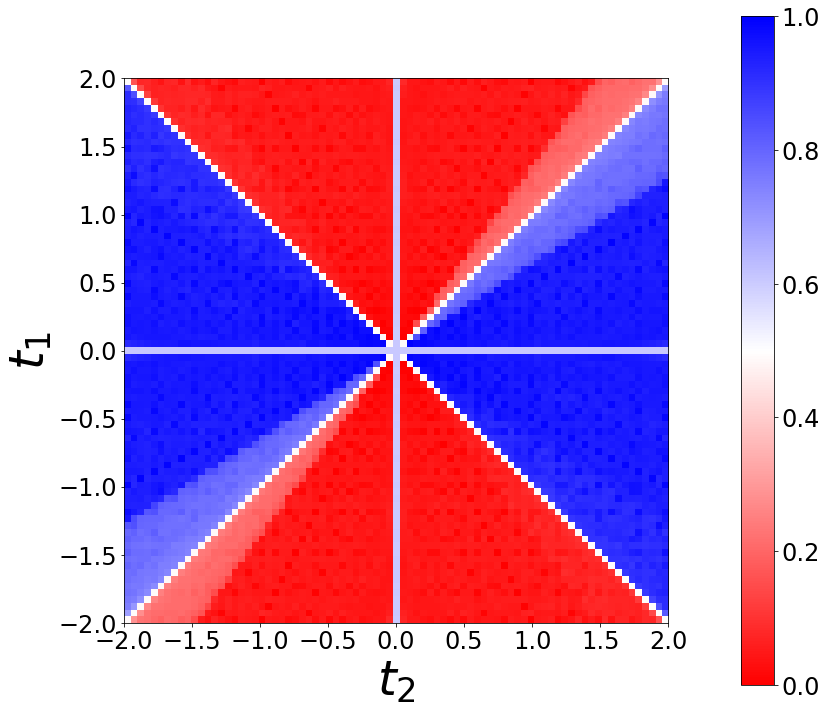

In [57]:
winding_params = {1: {"cmap": "bwr_r", "aspect": "equal", "alpha": None, "origin": "lower", "extent": [-2,2,-2,2], \
                  "vmin": 0, "vmax": 1}}
#colorbar_params={"mappable": None, "ticks": np.linspace(0,1,6), "orientation": "vertical", "pad": 0.1, "shrink": 0.8}
colorbar_params={1: {"mappable": None, "labelsize": 24, "ticks": [0, 0.2, 0.4, 0.6, 0.8, 1.0], "pad": 0.1, "shrink": 0.8, \
                     "extend": "neither"}}
#"ticks": [0, 0.2, 0.4, 0.6, 0.8, 1.0]
##########
fig_params = {"figsize": (12,12)}
xlabel_params={"xlabel": "$t_2$", "fontsize": 48}
ylabel_params={"ylabel": "$t_1$", "fontsize": 48}
title_params={}
xlim_params = {"left": np.min(simulation.t2), "right": np.max(simulation.t2)}
ylim_params = {"bottom": np.min(simulation.t1), "top": np.max(simulation.t1)}
xticks_params = {"fontsize": 24}
yticks_params = {"fontsize": 24}
tight_params = {}
path_to_save = "/home/rio/1901.01963/first_neighbours_open_6561_110_random_feat_2_simulation_merged_winding_grid.png"
savefig_params = {"fname": path_to_save}
simulation.merge_imshow_winding_grids(winding_params, colorbar_params, fig_params, xlabel_params, ylabel_params, \
                                      title_params, xlim_params, ylim_params, xticks_params, yticks_params,  \
                                      tight_params, savefig_params)